In [176]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from numpy.fft import fft, ifft,fftfreq

In [2]:
with open('pd_gaba.pickle', 'rb') as handle:
    pd_gaba = pickle.load(handle)
print("pd_gaba shape",pd_gaba.shape)

with open('pd_recuperacion.pickle', 'rb') as handle:
    pd_recuperacion = pickle.load(handle)
print("pd_recuperacion shape",pd_recuperacion.shape)

with open('pd_control.pickle', 'rb') as handle:
    pd_control = pickle.load(handle)
print("pd_control shape",pd_control.shape)

pd_gaba shape (16384000, 3)
pd_recuperacion shape (16384000, 2)
pd_control shape (19847700, 2)


In [3]:
def powerSpectrum(signal_array,signal_spacing,nombre_señal):
    signal_freq = 1/signal_spacing
    n_signal = len(signal_array)

    freqs_signal = (signal_freq)*np.arange(0,n_signal)/n_signal

    mask = fftfreq(n_signal) > 0

    fft_signal = fft(signal_array)

    fft_unilateral = (2.0 * np.abs(fft_signal/n_signal))

    ps_signal = 2.0 * np.square(np.abs(fft_signal/n_signal))

    #plt.figure(figsize=(12, 6))
    #plt.plot(freqs_signal[mask], fft_unilateral[mask])
    #plt.title('FFT vs Frecuencia - ' + nombre_señal)
    #plt.xlabel('Frecuencia (Hz)')
    #plt.ylabel('FFT (mV)')
    #plt.show()

    #plt.figure(figsize=(12, 6))
    #plt.plot(freqs_signal[mask], ps_signal[mask])
    #plt.title('Power Espectrum - ' + nombre_señal)
    #plt.xlabel('Frecuencia (Hz)')
    #plt.ylabel('Power ($mV^2/Hz$)')
    #plt.xlim(0,2000)
    #plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    #plt.show()

    return freqs_signal,fft_signal,fft_unilateral,ps_signal


In [69]:
np.linspace(0.,1,len(pd_control.vd[:100000]))/0.1

array([0.00000e+00, 1.00001e-04, 2.00002e-04, ..., 9.99980e+00,
       9.99990e+00, 1.00000e+01])

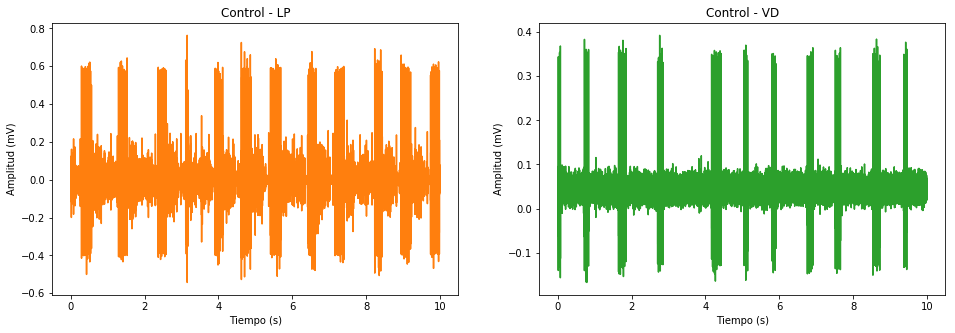

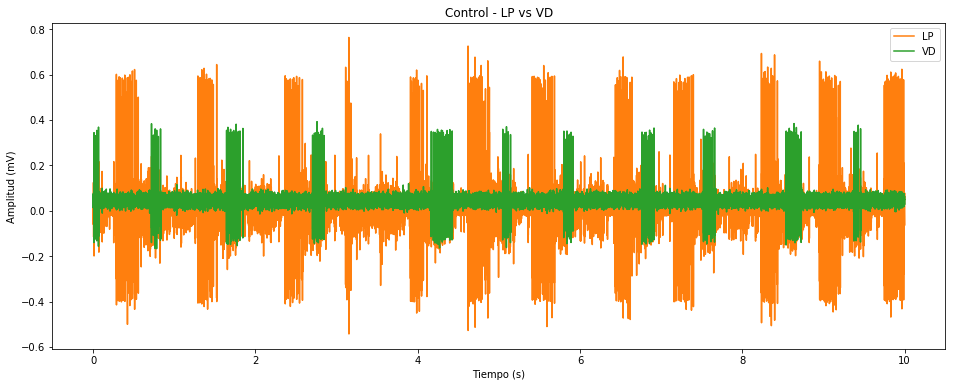

In [98]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 5))

ax1.plot(np.linspace(0.,1,len(pd_control.vd[:100000]))/0.1,pd_control.lp[:100000], color = 'C1')
ax1.set_title("Control - LP")
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Amplitud (mV)')

ax2.plot(np.linspace(0.,1,len(pd_control.vd[:100000]))/0.1,pd_control.vd[:100000], color = 'C2')
ax2.set_title("Control - VD")
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Amplitud (mV)')

plt.show()

plt.figure(figsize=(16, 6))

plt.plot(np.linspace(0.,1,len(pd_control.vd[:100000]))/0.1,pd_control.lp[:100000], color = 'C1', label = 'LP')
plt.plot(np.linspace(0.,1,len(pd_control.vd[:100000]))/0.1,pd_control.vd[:100000], color = 'C2',label = 'VD')
plt.title("Control - LP vs VD")
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.show()

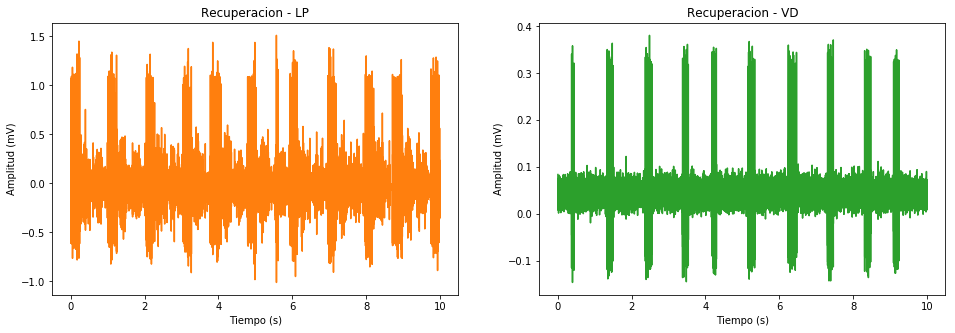

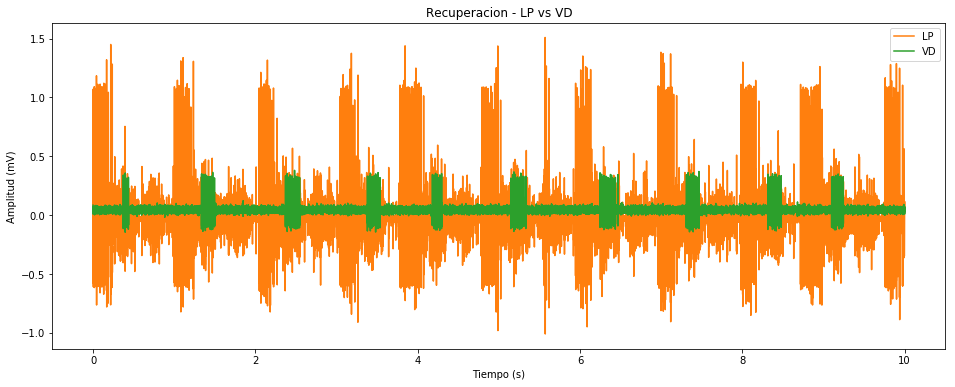

In [99]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 5))

ax1.plot(np.linspace(0.,1,len(pd_recuperacion.vd[:100000]))/0.1,pd_recuperacion.lp[:100000], color = 'C1')
ax1.set_title("Recuperacion - LP")
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Amplitud (mV)')

ax2.plot(np.linspace(0.,1,len(pd_recuperacion.vd[:100000]))/0.1,pd_recuperacion.vd[:100000], color = 'C2')
ax2.set_title("Recuperacion - VD")
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Amplitud (mV)')

plt.show()

plt.figure(figsize=(16, 6))

plt.plot(np.linspace(0.,1,len(pd_recuperacion.vd[:100000]))/0.1,pd_recuperacion.lp[:100000], color = 'C1', label = 'LP')
plt.plot(np.linspace(0.,1,len(pd_recuperacion.vd[:100000]))/0.1,pd_recuperacion.vd[:100000], color = 'C2',label = 'VD')
plt.title("Recuperacion - LP vs VD")
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.show()

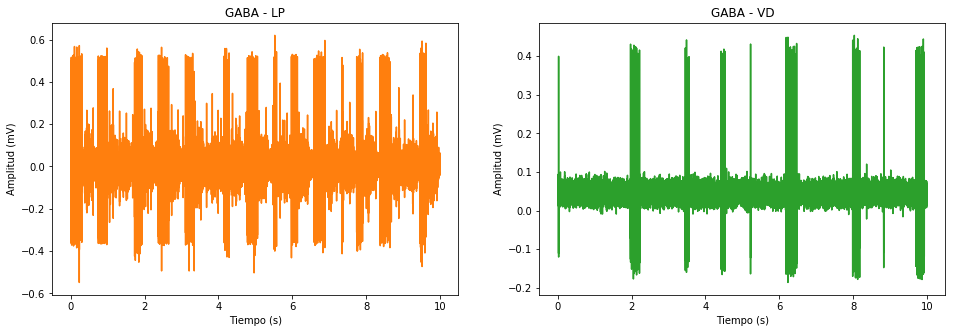

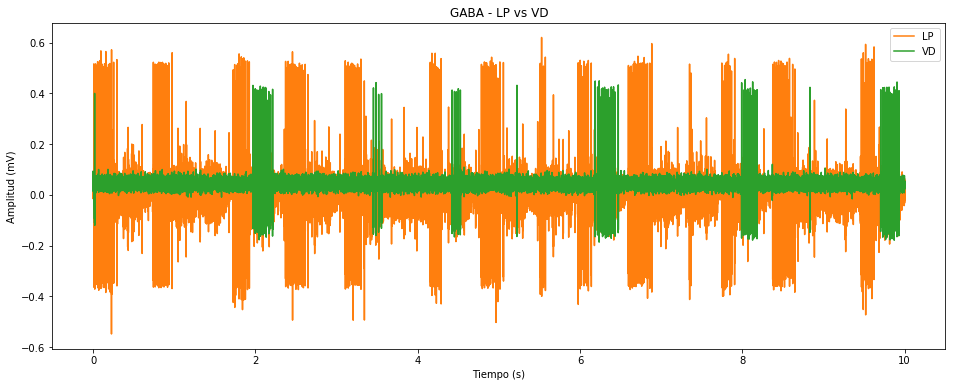

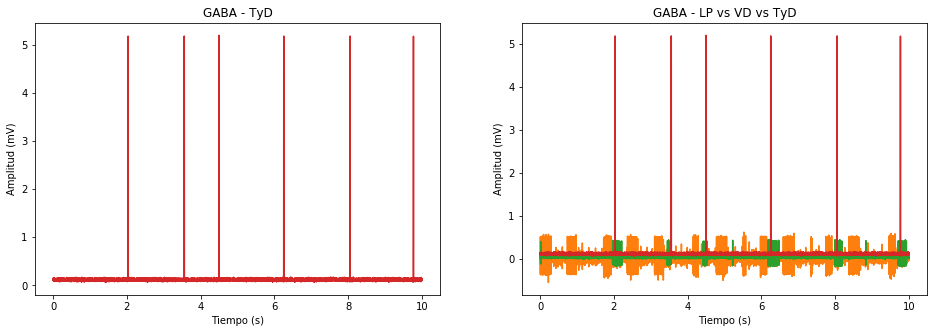

In [106]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 5))

ax1.plot(np.linspace(0.,1,len(pd_gaba.vd[:100000]))/0.1,pd_gaba.lp[:100000], color = 'C1')
ax1.set_title("GABA - LP")
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Amplitud (mV)')

ax2.plot(np.linspace(0.,1,len(pd_gaba.vd[:100000]))/0.1,pd_gaba.vd[:100000], color = 'C2')
ax2.set_title("GABA - VD")
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Amplitud (mV)')

plt.show()

plt.figure(figsize=(16, 6))

plt.plot(np.linspace(0.,1,len(pd_gaba.vd[:100000]))/0.1,pd_gaba.lp[:100000], color = 'C1', label = 'LP')
plt.plot(np.linspace(0.,1,len(pd_gaba.vd[:100000]))/0.1,pd_gaba.vd[:100000], color = 'C2',label = 'VD')
plt.title("GABA - LP vs VD")
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 5))

ax1.plot(np.linspace(0.,1,len(pd_gaba.tyd[:100000]))/0.1,pd_gaba.tyd[:100000], color = 'C3')
ax1.set_title("GABA - TyD")
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Amplitud (mV)')

ax2.plot(np.linspace(0.,1,len(pd_gaba.vd[:100000]))/0.1,pd_gaba.lp[:100000], color = 'C1', label = 'LP')
ax2.plot(np.linspace(0.,1,len(pd_gaba.vd[:100000]))/0.1,pd_gaba.vd[:100000], color = 'C2',label = 'VD')
ax2.plot(np.linspace(0.,1,len(pd_gaba.tyd[:100000]))/0.1,pd_gaba.tyd[:100000], color = 'C3',label = 'TyD')
ax2.set_title("GABA - LP vs VD vs TyD")
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Amplitud (mV)')

plt.show()

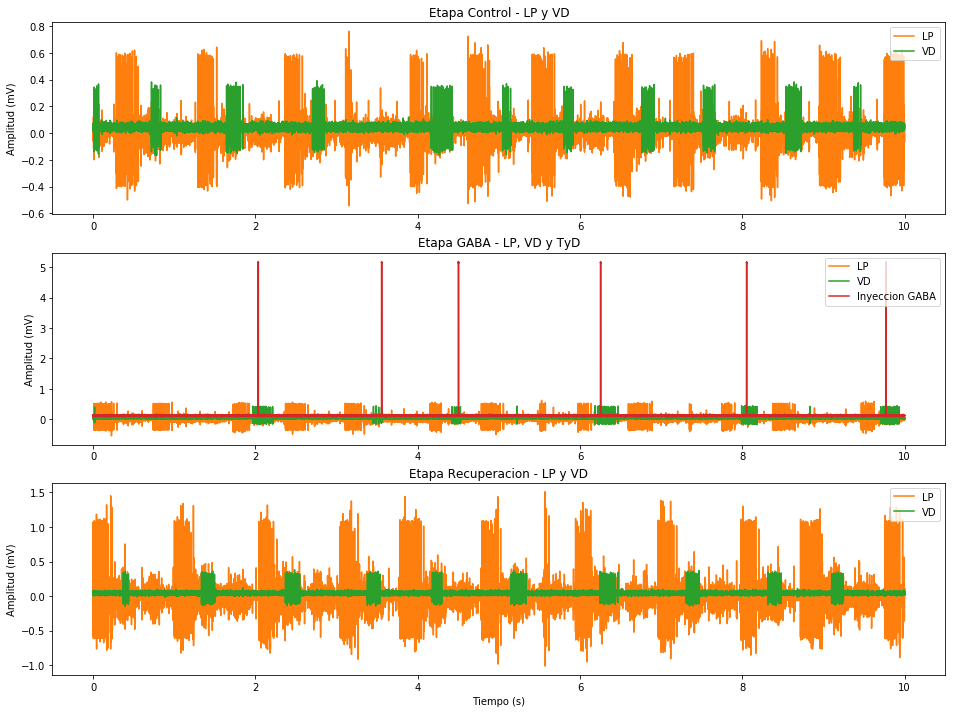

In [146]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(16, 12))

ax1.plot(np.linspace(0.,1,len(pd_control.vd[:100000]))/0.1,pd_control.lp[:100000], color = 'C1', label = 'LP')
ax1.plot(np.linspace(0.,1,len(pd_control.vd[:100000]))/0.1,pd_control.vd[:100000], color = 'C2',label = 'VD')
ax1.set_title("Etapa Control - LP y VD")
ax1.set_ylabel('Amplitud (mV)')
ax1.legend(loc="upper right")

ax2.plot(np.linspace(0.,1,len(pd_gaba.vd[:100000]))/0.1,pd_gaba.lp[:100000], color = 'C1', label = 'LP')
ax2.plot(np.linspace(0.,1,len(pd_gaba.vd[:100000]))/0.1,pd_gaba.vd[:100000], color = 'C2',label = 'VD')
ax2.plot(np.linspace(0.,1,len(pd_gaba.tyd[:100000]))/0.1,pd_gaba.tyd[:100000], color = 'C3',label = 'Inyeccion GABA')
ax2.set_title("Etapa GABA - LP, VD y TyD")
ax2.set_ylabel('Amplitud (mV)')
ax2.legend(loc="upper right")

ax3.plot(np.linspace(0.,1,len(pd_recuperacion.vd[:100000]))/0.1,pd_recuperacion.lp[:100000], color = 'C1', label = 'LP')
ax3.plot(np.linspace(0.,1,len(pd_recuperacion.vd[:100000]))/0.1,pd_recuperacion.vd[:100000], color = 'C2',label = 'VD')
ax3.set_title("Etapa Recuperacion - LP y VD")
ax3.set_xlabel('Tiempo (s)')
ax3.set_ylabel('Amplitud (mV)')
ax3.legend(loc="upper right")

plt.show()

In [7]:
1/1e-4

10000.0

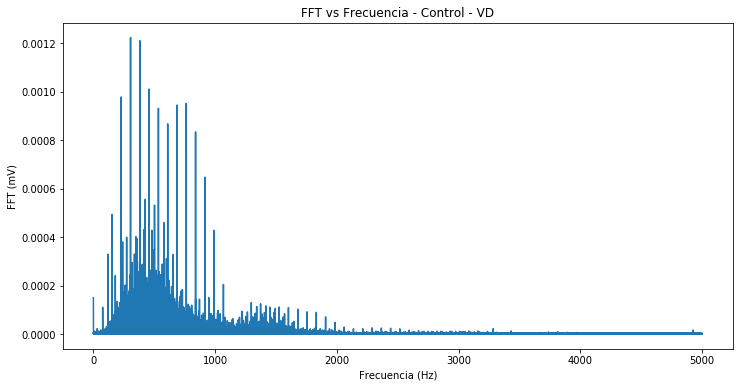

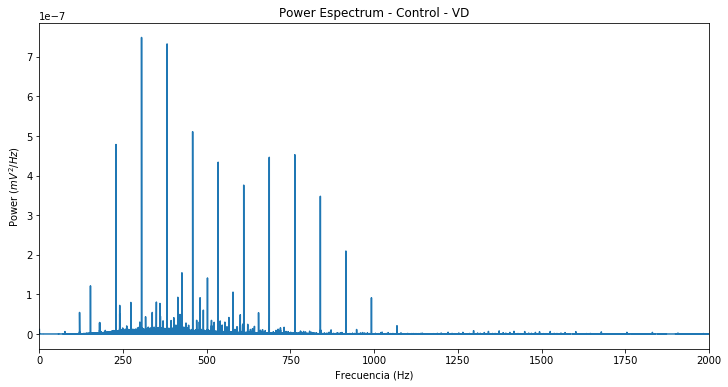

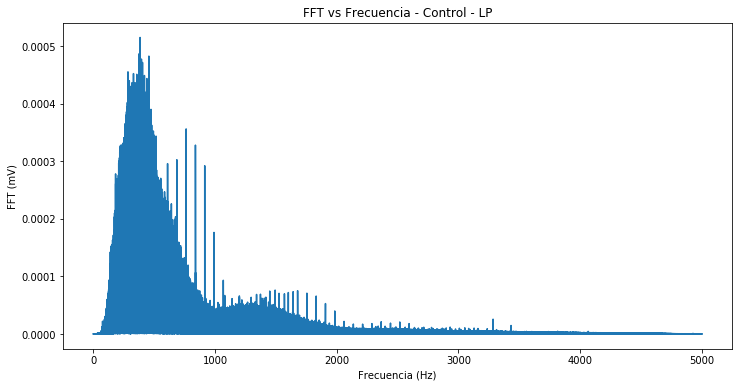

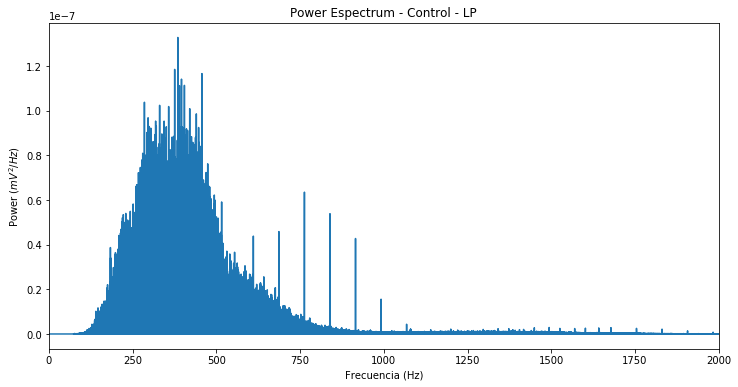

In [8]:
C_vd_freqs_signal,C_vd_fft_signal,C_vd_fft_unilateral,C_vd_ps_signal = powerSpectrum(np.array(pd_control.vd,dtype='double'),1e-4,'Control - VD')

C_lp_freqs_signal,C_lp_fft_signal,C_lp_fft_unilateral,C_lp_ps_signal = powerSpectrum(np.array(pd_control.lp,dtype='double'),1e-4,'Control - LP')

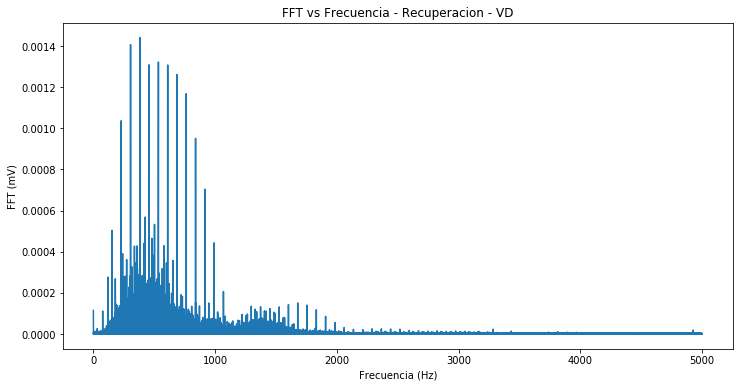

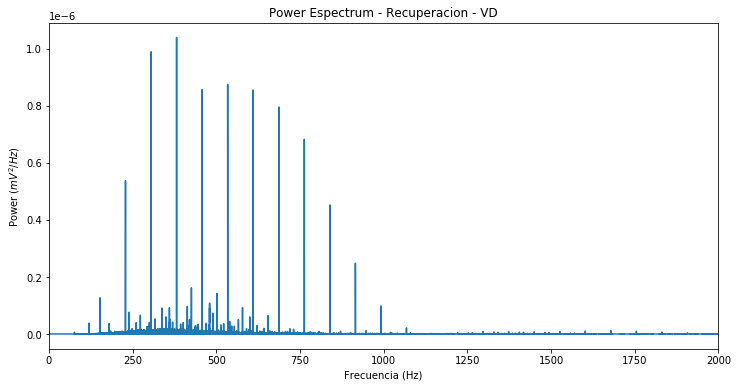

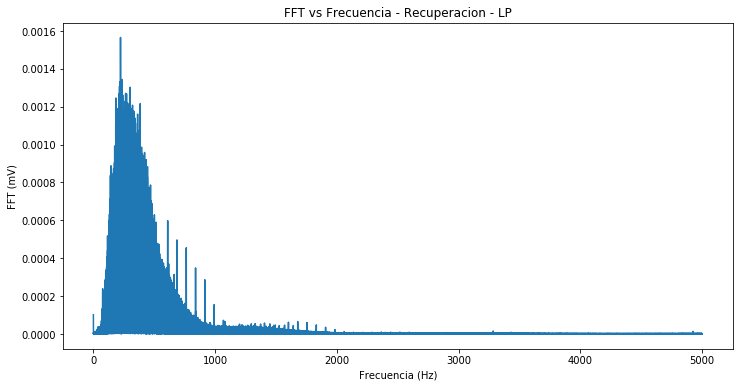

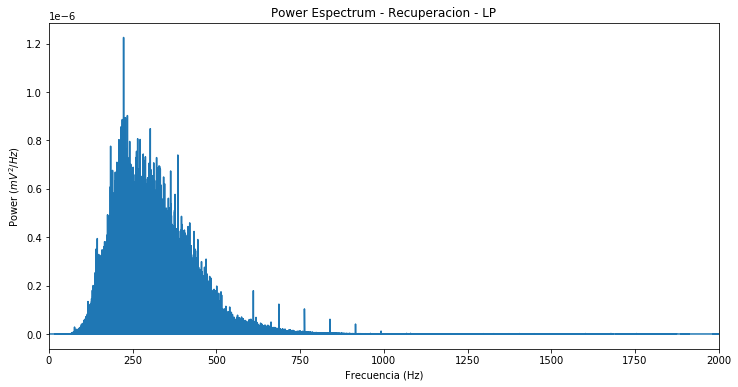

In [9]:
R_vd_freqs_signal,R_vd_fft_signal,R_vd_fft_unilateral,R_vd_ps_signal = powerSpectrum(np.array(pd_recuperacion.vd,dtype='double'),1e-4,'Recuperacion - VD')

R_lp_freqs_signal,R_lp_fft_signal,R_lp_fft_unilateral,R_lp_ps_signal = powerSpectrum(np.array(pd_recuperacion.lp,dtype='double'),1e-4,'Recuperacion - LP')

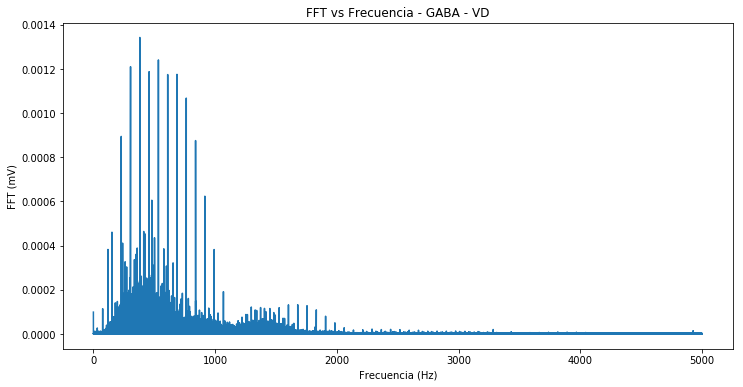

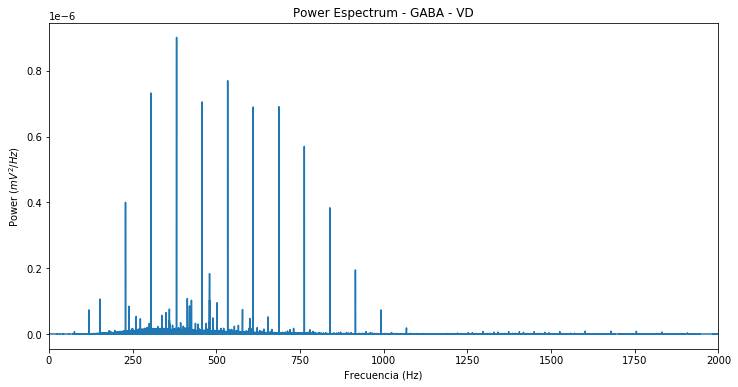

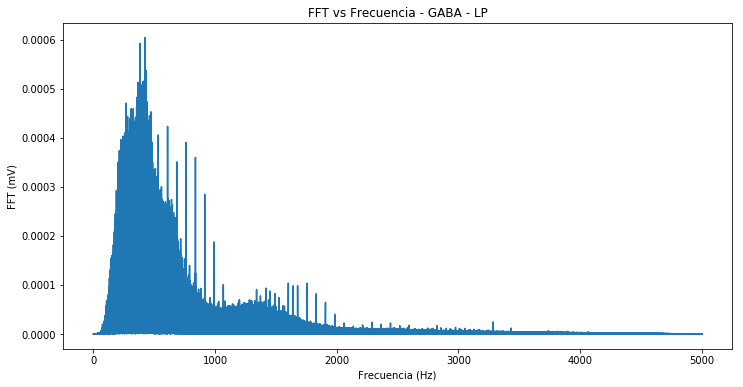

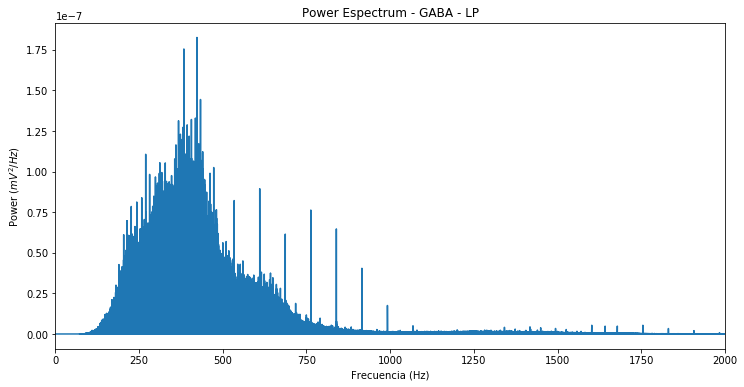

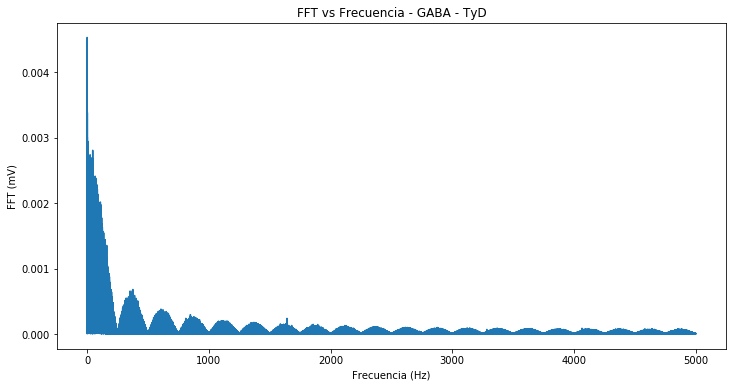

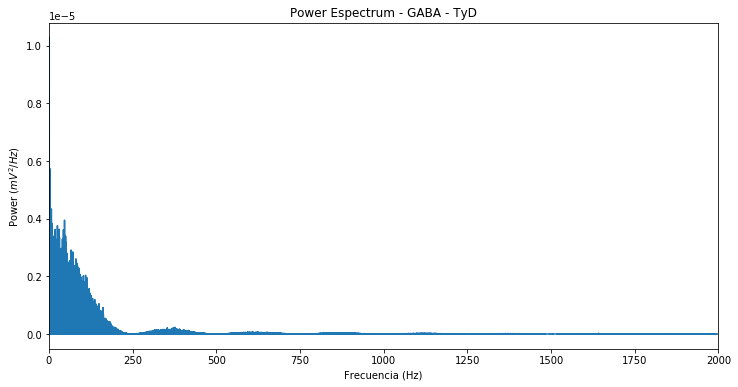

In [11]:
G_vd_freqs_signal,G_vd_fft_signal,G_vd_fft_unilateral,G_vd_ps_signal = powerSpectrum(np.array(pd_gaba.vd,dtype='double'),1e-4,'GABA - VD')

G_lp_freqs_signal,G_lp_fft_signal,G_lp_fft_unilateral,G_lp_ps_signal = powerSpectrum(np.array(pd_gaba.lp,dtype='double'),1e-4,'GABA - LP')

G_tyd_freqs_signal,G_tyd_fft_signal,G_tyd_fft_unilateral,G_tyd_ps_signal = powerSpectrum(np.array(pd_gaba.tyd,dtype='double'),1e-4,'GABA - TyD')

In [13]:
G_tyd_freqs_signal.shape,G_tyd_fft_signal.shape,G_tyd_fft_unilateral.shape,G_tyd_ps_signal.shape

((16384000,), (16384000,), (16384000,), (16384000,))

In [17]:
pd_gaba_fft = pd.DataFrame(
{'vd_freqs': G_vd_freqs_signal,'vd_fft': G_vd_fft_signal, 'vd_fft_unilateral': G_vd_fft_unilateral, 'vd_ps': G_vd_ps_signal,
'lp_freqs': G_lp_freqs_signal,'lp_fft': G_lp_fft_signal, 'lp_fft_unilateral': G_lp_fft_unilateral, 'lp_ps': G_lp_ps_signal,
'tyd_freqs': G_tyd_freqs_signal,'tyd_fft': G_tyd_fft_signal, 'tyd_fft_unilateral': G_tyd_fft_unilateral, 'tyd_ps': G_tyd_ps_signal}
)
pd_gaba_fft.shape

(16384000, 12)

In [19]:
pd_control_fft = pd.DataFrame(
{'vd_freqs': C_vd_freqs_signal,'vd_fft': C_vd_fft_signal, 'vd_fft_unilateral': C_vd_fft_unilateral, 'vd_ps': C_vd_ps_signal,
'lp_freqs': C_lp_freqs_signal,'lp_fft': C_lp_fft_signal, 'lp_fft_unilateral': C_lp_fft_unilateral, 'lp_ps': C_lp_ps_signal}
)
pd_control_fft.shape

(19847700, 8)

In [20]:
pd_recuperacion_fft = pd.DataFrame(
{'vd_freqs': R_vd_freqs_signal,'vd_fft': R_vd_fft_signal, 'vd_fft_unilateral': R_vd_fft_unilateral, 'vd_ps': R_vd_ps_signal,
'lp_freqs': R_lp_freqs_signal,'lp_fft': R_lp_fft_signal, 'lp_fft_unilateral': R_lp_fft_unilateral, 'lp_ps': R_lp_ps_signal}
)
pd_recuperacion_fft.shape

(16384000, 8)

In [21]:
with open('pd_gaba_fft.pickle', 'wb') as handle:
    pickle.dump(pd_gaba_fft, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('pd_recuperacion_fft.pickle', 'wb') as handle:
    pickle.dump(pd_recuperacion_fft, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('pd_control_fft.pickle', 'wb') as handle:
    pickle.dump(pd_control_fft, handle, protocol=pickle.HIGHEST_PROTOCOL)

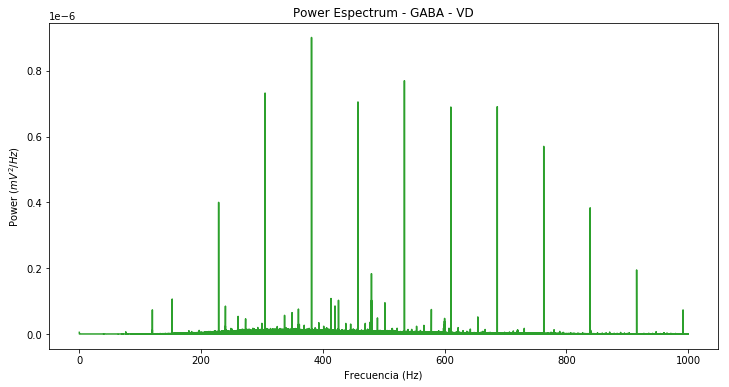

In [132]:
plt.figure(figsize=(12, 6))
plt.plot(pd_gaba_fft.vd_freqs[1:len(pd_gaba_fft)//10], np.abs(pd_gaba_fft.vd_ps)[1:len(pd_gaba_fft)//10], color = 'C2')
plt.title('Power Espectrum - ' + 'GABA - VD')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Power ($mV^2/Hz$)')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

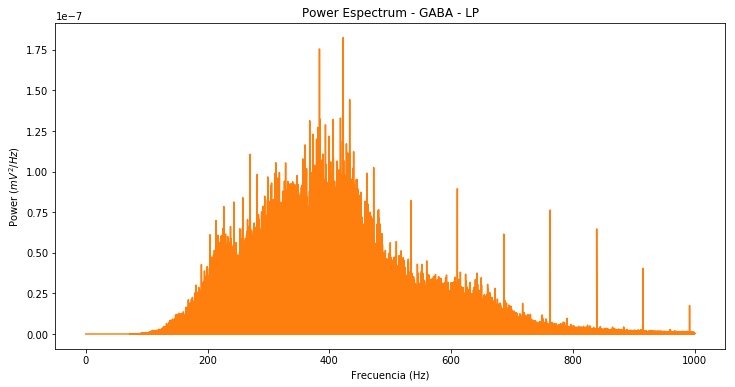

In [131]:
plt.figure(figsize=(12, 6))
plt.plot(pd_gaba_fft.vd_freqs[1:len(pd_gaba_fft)//10], np.abs(pd_gaba_fft.lp_ps)[1:len(pd_gaba_fft)//10], color = 'C1')
plt.title('Power Espectrum - ' + 'GABA - LP')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Power ($mV^2/Hz$)')
#plt.xlim(0,2000)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

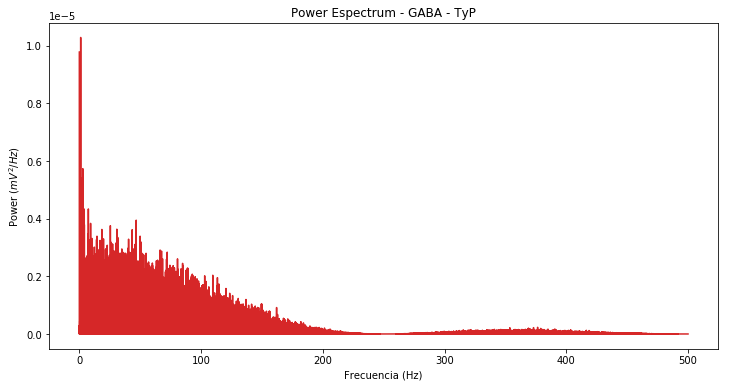

In [148]:
plt.figure(figsize=(12, 6))
plt.plot(pd_gaba_fft.vd_freqs[1:len(pd_gaba_fft)//20], np.abs(pd_gaba_fft.tyd_ps)[1:len(pd_gaba_fft)//20], Color = 'C3')
plt.title('Power Espectrum - ' + 'GABA - TyP')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Power ($mV^2/Hz$)')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

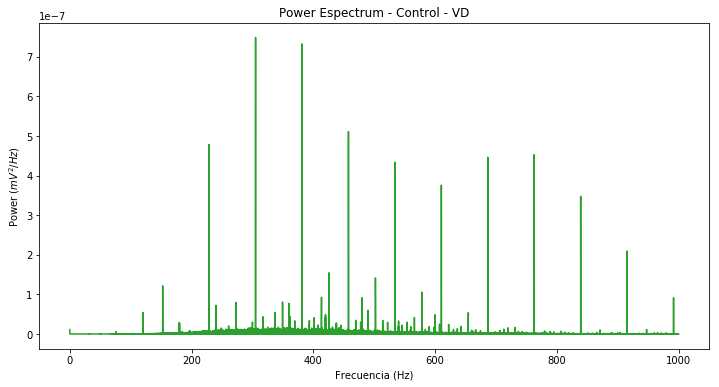

In [130]:
plt.figure(figsize=(12, 6))
plt.plot(pd_control_fft.vd_freqs[1:len(pd_control_fft)//10], np.abs(pd_control_fft.vd_ps)[1:len(pd_control_fft)//10], color = 'C2')
plt.title('Power Espectrum - ' + 'Control - VD')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Power ($mV^2/Hz$)')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

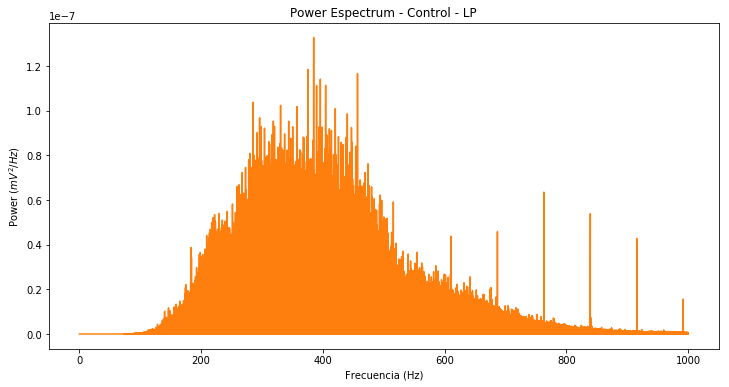

In [129]:
plt.figure(figsize=(12, 6))
plt.plot(pd_control_fft.vd_freqs[1:len(pd_control_fft)//10], np.abs(pd_control_fft.lp_ps)[1:len(pd_control_fft)//10], color = 'C1')
plt.title('Power Espectrum - ' + 'Control - LP')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Power ($mV^2/Hz$)')
#plt.xlim(0,2000)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

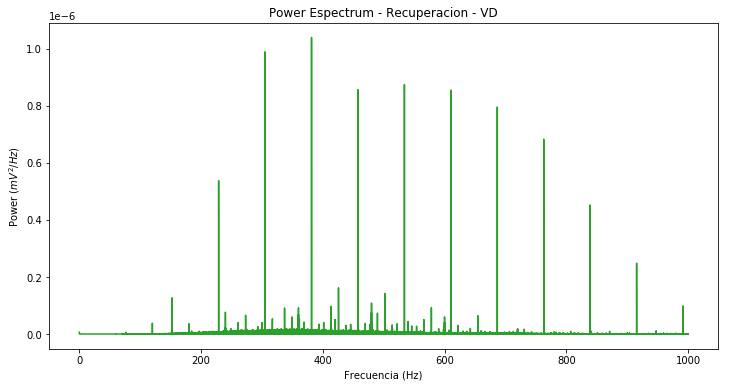

In [128]:
plt.figure(figsize=(12, 6))
plt.plot(pd_recuperacion_fft.vd_freqs[1:len(pd_recuperacion_fft)//10], np.abs(pd_recuperacion_fft.vd_ps)[1:len(pd_recuperacion_fft)//10], color = 'C2')
plt.title('Power Espectrum - ' + 'Recuperacion - VD')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Power ($mV^2/Hz$)')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

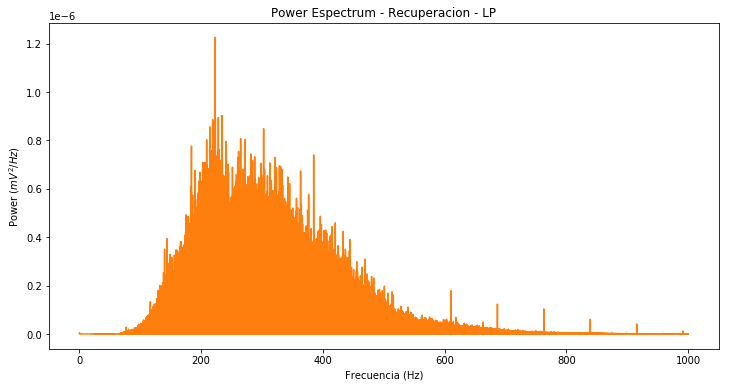

In [125]:
plt.figure(figsize=(12, 6))
plt.plot(pd_recuperacion_fft.vd_freqs[1:len(pd_recuperacion_fft)//10], np.abs(pd_recuperacion_fft.lp_ps)[1:len(pd_recuperacion_fft)//10], color = 'C1')
plt.title('Power Espectrum - ' + 'Recuperacion - LP')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Power ($mV^2/Hz$)')
#plt.xlim(0,2000)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

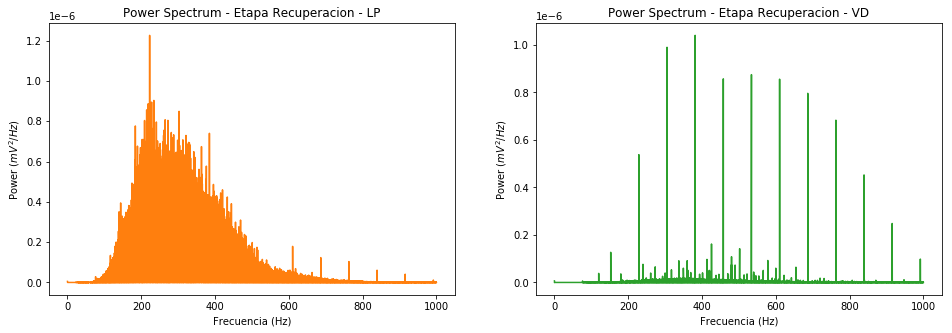

In [155]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 5))

ax1.plot(pd_recuperacion_fft.vd_freqs[1:len(pd_recuperacion_fft)//10], np.abs(pd_recuperacion_fft.lp_ps)[1:len(pd_recuperacion_fft)//10], color = 'C1')
ax1.set_title('Power Spectrum - Etapa Recuperacion - LP')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Power ($mV^2/Hz$)')
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax2.plot(pd_recuperacion_fft.vd_freqs[1:len(pd_recuperacion_fft)//10], np.abs(pd_recuperacion_fft.vd_ps)[1:len(pd_recuperacion_fft)//10], color = 'C2')
ax2.set_title('Power Spectrum - Etapa Recuperacion - VD')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Power ($mV^2/Hz$)')
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.show()


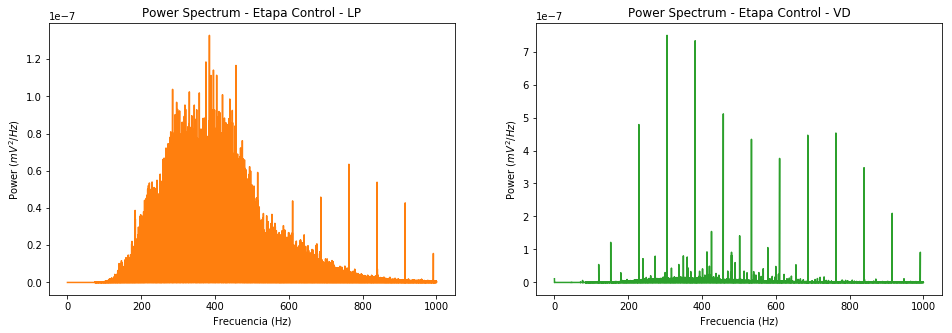

In [156]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 5))

ax1.plot(pd_control_fft.vd_freqs[1:len(pd_control_fft)//10], np.abs(pd_control_fft.lp_ps)[1:len(pd_control_fft)//10], color = 'C1')
ax1.set_title('Power Spectrum - Etapa Control - LP')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Power ($mV^2/Hz$)')
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax2.plot(pd_control_fft.vd_freqs[1:len(pd_control_fft)//10], np.abs(pd_control_fft.vd_ps)[1:len(pd_control_fft)//10], color = 'C2')
ax2.set_title('Power Spectrum - Etapa Control - VD')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Power ($mV^2/Hz$)')
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.show()


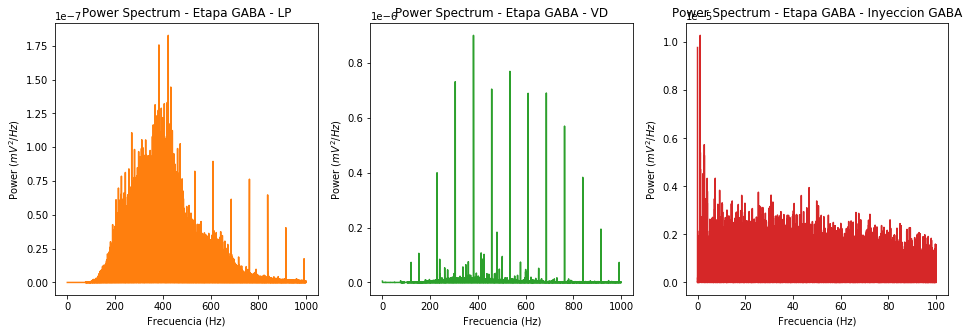

In [220]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16, 5))


ax1.plot(pd_gaba_fft.vd_freqs[1:len(pd_gaba_fft)//10], np.abs(pd_gaba_fft.lp_ps)[1:len(pd_gaba_fft)//10], color = 'C1')
ax1.set_title('Power Spectrum - Etapa GABA - LP')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Power ($mV^2/Hz$)')
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax2.plot(pd_gaba_fft.vd_freqs[1:len(pd_gaba_fft)//10], np.abs(pd_gaba_fft.vd_ps)[1:len(pd_gaba_fft)//10], color = 'C2')
ax2.set_title('Power Spectrum - Etapa GABA - VD')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Power ($mV^2/Hz$)')
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax3.plot(pd_gaba_fft.vd_freqs[1:len(pd_gaba_fft)//100], np.abs(pd_gaba_fft.tyd_ps)[1:len(pd_gaba_fft)//100], Color = 'C3')
ax3.set_title('Power Spectrum - Etapa GABA - Inyeccion GABA')
ax3.set_xlabel('Frecuencia (Hz)')
ax3.set_ylabel('Power ($mV^2/Hz$)')
ax3.ticklabel_format(axis="y", style="sci", scilimits=(0,0))


plt.show()


# Filtro ruido

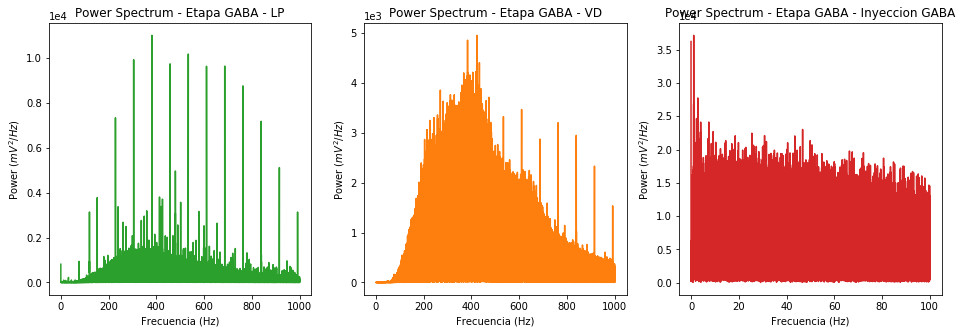

In [184]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16, 5))


ax1.plot(pd_gaba_fft.vd_freqs[1:len(pd_gaba_fft)//10], np.abs(pd_gaba_fft.vd_fft)[1:len(pd_gaba_fft)//10], color = 'C2')
ax1.set_title('Power Spectrum - Etapa GABA - LP')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Power ($mV^2/Hz$)')
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax2.plot(pd_gaba_fft.vd_freqs[1:len(pd_gaba_fft)//10], np.abs(pd_gaba_fft.lp_fft)[1:len(pd_gaba_fft)//10], color = 'C1')
ax2.set_title('Power Spectrum - Etapa GABA - VD')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Power ($mV^2/Hz$)')
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax3.plot(pd_gaba_fft.vd_freqs[1:len(pd_gaba_fft)//100], np.abs(pd_gaba_fft.tyd_fft)[1:len(pd_gaba_fft)//100], Color = 'C3')
ax3.set_title('Power Spectrum - Etapa GABA - Inyeccion GABA')
ax3.set_xlabel('Frecuencia (Hz)')
ax3.set_ylabel('Power ($mV^2/Hz$)')
ax3.ticklabel_format(axis="y", style="sci", scilimits=(0,0))


plt.show()


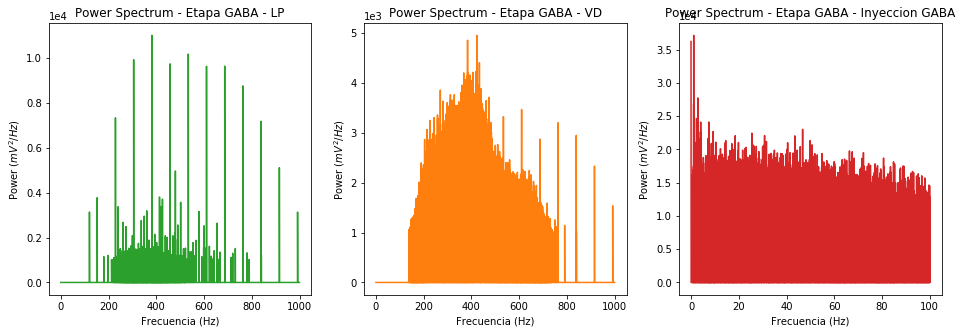

In [197]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16, 5))


ax1.plot(pd_gaba_fft.vd_freqs[1:len(pd_gaba_fft)//10], np.where(np.abs(pd_gaba_fft.vd_fft) < 1e3,0,np.abs(pd_gaba_fft.vd_fft))[1:len(pd_gaba_fft)//10], color = 'C2')
ax1.set_title('Power Spectrum - Etapa GABA - LP')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Power ($mV^2/Hz$)')
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax2.plot(pd_gaba_fft.vd_freqs[1:len(pd_gaba_fft)//10], np.where(np.abs(pd_gaba_fft.lp_fft) < 1e3,0,np.abs(pd_gaba_fft.lp_fft))[1:len(pd_gaba_fft)//10], color = 'C1')
ax2.set_title('Power Spectrum - Etapa GABA - VD')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Power ($mV^2/Hz$)')
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax3.plot(pd_gaba_fft.vd_freqs[1:len(pd_gaba_fft)//100], np.where(np.abs(pd_gaba_fft.tyd_fft) < 1e4,0,np.abs(pd_gaba_fft.tyd_fft)) [1:len(pd_gaba_fft)//100], Color = 'C3')
ax3.set_title('Power Spectrum - Etapa GABA - Inyeccion GABA')
ax3.set_xlabel('Frecuencia (Hz)')
ax3.set_ylabel('Power ($mV^2/Hz$)')
ax3.ticklabel_format(axis="y", style="sci", scilimits=(0,0))


plt.show()


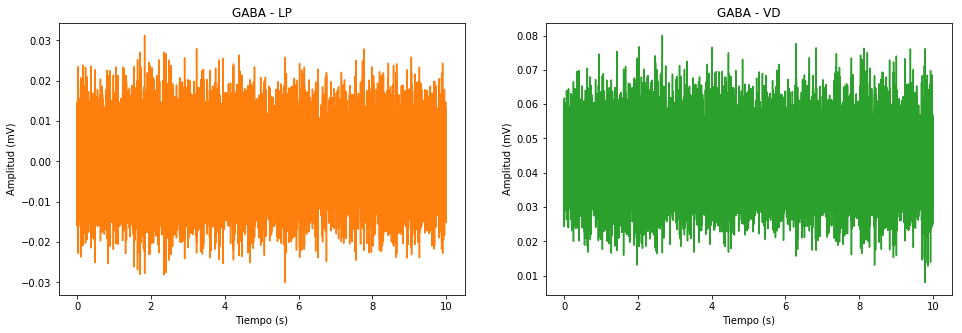

In [199]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 5))

ax1.plot(np.linspace(0.,1,len(pd_gaba.vd[:100000]))/0.1,ifft(np.where(np.abs(pd_gaba_fft.vd_fft) < 1e3,0,pd_gaba_fft.lp_fft)).real[:100000], color = 'C1')
ax1.set_title("GABA - LP")
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Amplitud (mV)')

ax2.plot(np.linspace(0.,1,len(pd_gaba.vd[:100000]))/0.1,ifft(np.where(np.abs(pd_gaba_fft.vd_fft) < 1e3,0,pd_gaba_fft.vd_fft)).real[:100000], color = 'C2')
ax2.set_title("GABA - VD")
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Amplitud (mV)')

plt.show()

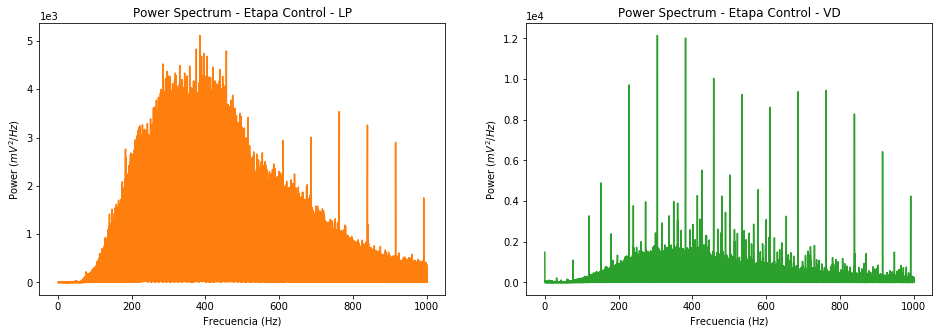

In [203]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 5))

ax1.plot(pd_control_fft.vd_freqs[1:len(pd_control_fft)//10], np.abs(pd_control_fft.lp_fft)[1:len(pd_control_fft)//10], color = 'C1')
ax1.set_title('Power Spectrum - Etapa Control - LP')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Power ($mV^2/Hz$)')
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax2.plot(pd_control_fft.vd_freqs[1:len(pd_control_fft)//10], np.abs(pd_control_fft.vd_fft)[1:len(pd_control_fft)//10], color = 'C2')
ax2.set_title('Power Spectrum - Etapa Control - VD')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Power ($mV^2/Hz$)')
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.show()


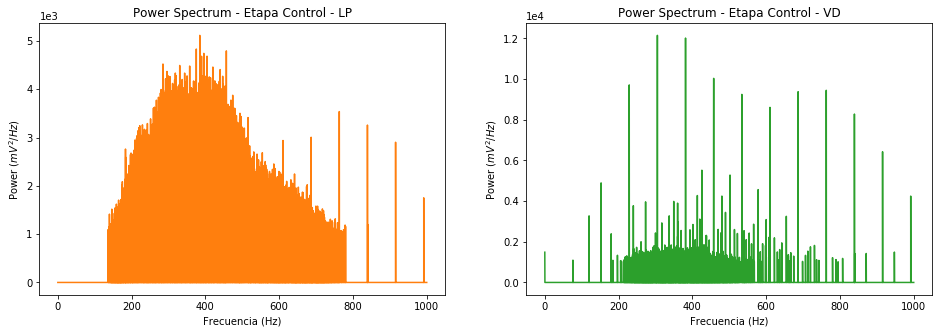

In [204]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 5))

ax1.plot(pd_control_fft.vd_freqs[1:len(pd_control_fft)//10],np.where(np.abs(pd_control_fft.lp_fft) < 1e3,0,np.abs(pd_control_fft.lp_fft))[1:len(pd_control_fft)//10], color = 'C1')
ax1.set_title('Power Spectrum - Etapa Control - LP')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Power ($mV^2/Hz$)')
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax2.plot(pd_control_fft.vd_freqs[1:len(pd_control_fft)//10],np.where(np.abs(pd_control_fft.vd_fft) < 1e3,0,np.abs(pd_control_fft.vd_fft))[1:len(pd_control_fft)//10], color = 'C2')
ax2.set_title('Power Spectrum - Etapa Control - VD')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Power ($mV^2/Hz$)')
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.show()


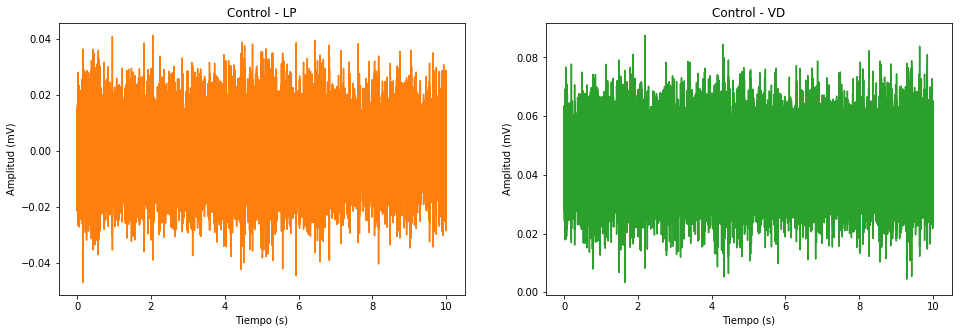

In [205]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 5))

ax1.plot(np.linspace(0.,1,len(pd_gaba.vd[:100000]))/0.1,ifft(np.where(np.abs(pd_control_fft.vd_fft) < 1e3,0,pd_control_fft.lp_fft)).real[:100000], color = 'C1')
ax1.set_title("Control - LP")
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Amplitud (mV)')

ax2.plot(np.linspace(0.,1,len(pd_gaba.vd[:100000]))/0.1,ifft(np.where(np.abs(pd_control_fft.vd_fft) < 1e3,0,pd_control_fft.vd_fft)).real[:100000], color = 'C2')
ax2.set_title("Control - VD")
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Amplitud (mV)')

plt.show()

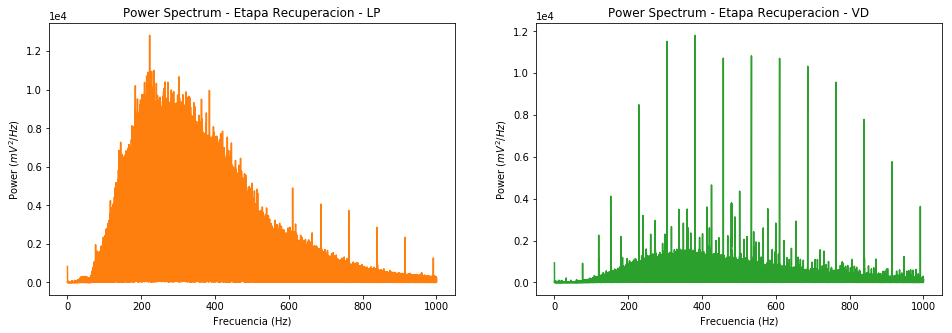

In [206]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 5))

ax1.plot(pd_recuperacion_fft.vd_freqs[1:len(pd_recuperacion_fft)//10], np.abs(pd_recuperacion_fft.lp_fft)[1:len(pd_recuperacion_fft)//10], color = 'C1')
ax1.set_title('Power Spectrum - Etapa Recuperacion - LP')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Power ($mV^2/Hz$)')
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax2.plot(pd_recuperacion_fft.vd_freqs[1:len(pd_recuperacion_fft)//10], np.abs(pd_recuperacion_fft.vd_fft)[1:len(pd_recuperacion_fft)//10], color = 'C2')
ax2.set_title('Power Spectrum - Etapa Recuperacion - VD')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Power ($mV^2/Hz$)')
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.show()


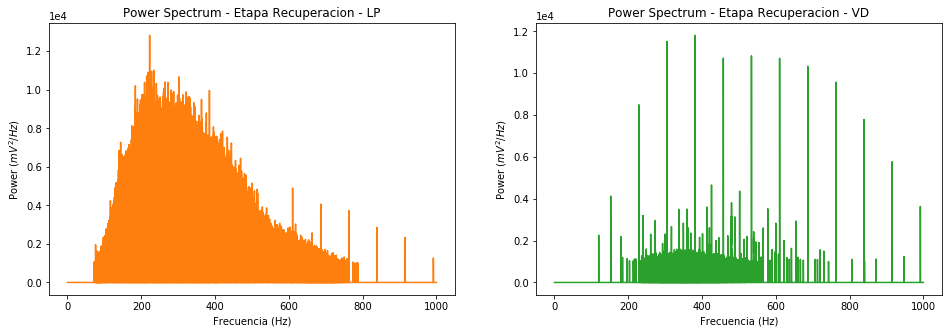

In [208]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 5))

ax1.plot(pd_recuperacion_fft.vd_freqs[1:len(pd_recuperacion_fft)//10],np.where(np.abs(pd_recuperacion_fft.lp_fft) < 1e3,0,np.abs(pd_recuperacion_fft.lp_fft))[1:len(pd_recuperacion_fft)//10], color = 'C1')
ax1.set_title('Power Spectrum - Etapa Recuperacion - LP')
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('Power ($mV^2/Hz$)')
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax2.plot(pd_recuperacion_fft.vd_freqs[1:len(pd_recuperacion_fft)//10],np.where(np.abs(pd_recuperacion_fft.vd_fft) < 1e3,0,np.abs(pd_recuperacion_fft.vd_fft))[1:len(pd_recuperacion_fft)//10], color = 'C2')
ax2.set_title('Power Spectrum - Etapa Recuperacion - VD')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Power ($mV^2/Hz$)')
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.show()


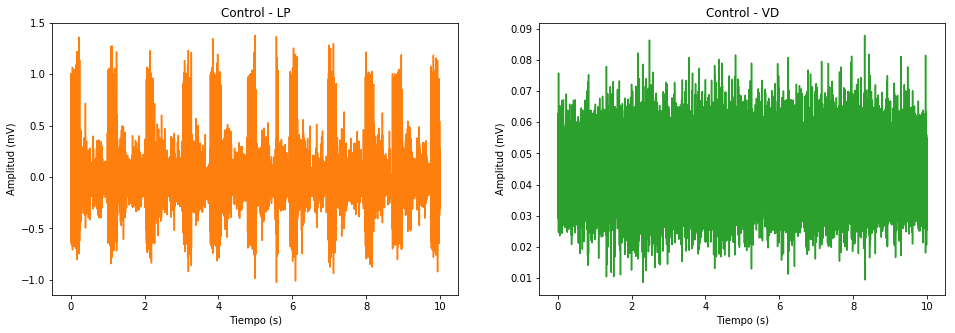

In [217]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 5))

ax1.plot(np.linspace(0.,1,len(pd_recuperacion.vd[:100000]))/0.1,ifft(np.where(np.abs(pd_recuperacion_fft.lp_fft) < 1e3,0,pd_recuperacion_fft.lp_fft)).real[:100000], color = 'C1')
ax1.set_title("Control - LP")
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Amplitud (mV)')

ax2.plot(np.linspace(0.,1,len(pd_recuperacion.vd[:100000]))/0.1,ifft(np.where(np.abs(pd_recuperacion_fft.vd_fft) < 1e3,0,pd_recuperacion_fft.vd_fft)).real[:100000], color = 'C2')
ax2.set_title("Control - VD")
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Amplitud (mV)')

plt.show()

# Filtro actividad predominante 1e3

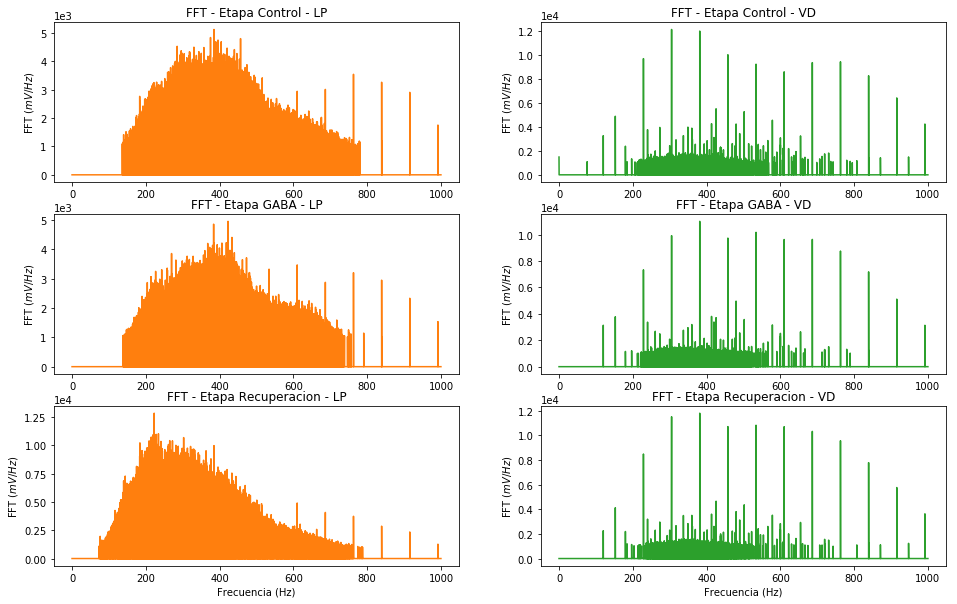

In [216]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 2,figsize=(16, 10))

ax1[0].plot(pd_control_fft.vd_freqs[1:len(pd_control_fft)//10],np.where(np.abs(pd_control_fft.lp_fft) < 1e3,0,np.abs(pd_control_fft.lp_fft))[1:len(pd_control_fft)//10], color = 'C1')
ax1[0].set_title('FFT - Etapa Control - LP')
ax1[0].set_ylabel('FFT ($mV/Hz$)')
ax1[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax1[1].plot(pd_control_fft.vd_freqs[1:len(pd_control_fft)//10],np.where(np.abs(pd_control_fft.vd_fft) < 1e3,0,np.abs(pd_control_fft.vd_fft))[1:len(pd_control_fft)//10], color = 'C2')
ax1[1].set_title('FFT - Etapa Control - VD')
ax1[1].set_ylabel('FFT ($mV/Hz$)')
ax1[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax2[0].plot(pd_gaba_fft.vd_freqs[1:len(pd_gaba_fft)//10], np.where(np.abs(pd_gaba_fft.lp_fft) < 1e3,0,np.abs(pd_gaba_fft.lp_fft))[1:len(pd_gaba_fft)//10], color = 'C1')
ax2[0].set_title('FFT - Etapa GABA - LP')
ax2[0].set_ylabel('FFT ($mV/Hz$)')
ax2[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax2[1].plot(pd_gaba_fft.vd_freqs[1:len(pd_gaba_fft)//10], np.where(np.abs(pd_gaba_fft.vd_fft) < 1e3,0,np.abs(pd_gaba_fft.vd_fft))[1:len(pd_gaba_fft)//10], color = 'C2')
ax2[1].set_title('FFT - Etapa GABA - VD')
ax2[1].set_ylabel('FFT ($mV/Hz$)')
ax2[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))


ax3[0].plot(pd_recuperacion_fft.vd_freqs[1:len(pd_recuperacion_fft)//10],np.where(np.abs(pd_recuperacion_fft.lp_fft) < 1e3,0,np.abs(pd_recuperacion_fft.lp_fft))[1:len(pd_recuperacion_fft)//10], color = 'C1')
ax3[0].set_title('FFT - Etapa Recuperacion - LP')
ax3[0].set_xlabel('Frecuencia (Hz)')
ax3[0].set_ylabel('FFT ($mV/Hz$)')
ax3[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax3[1].plot(pd_recuperacion_fft.vd_freqs[1:len(pd_recuperacion_fft)//10],np.where(np.abs(pd_recuperacion_fft.vd_fft) < 1e3,0,np.abs(pd_recuperacion_fft.vd_fft))[1:len(pd_recuperacion_fft)//10], color = 'C2')
ax3[1].set_title('FFT - Etapa Recuperacion - VD')
ax3[1].set_xlabel('Frecuencia (Hz)')
ax3[1].set_ylabel('FFT ($mV/Hz$)')
ax3[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))


plt.show()


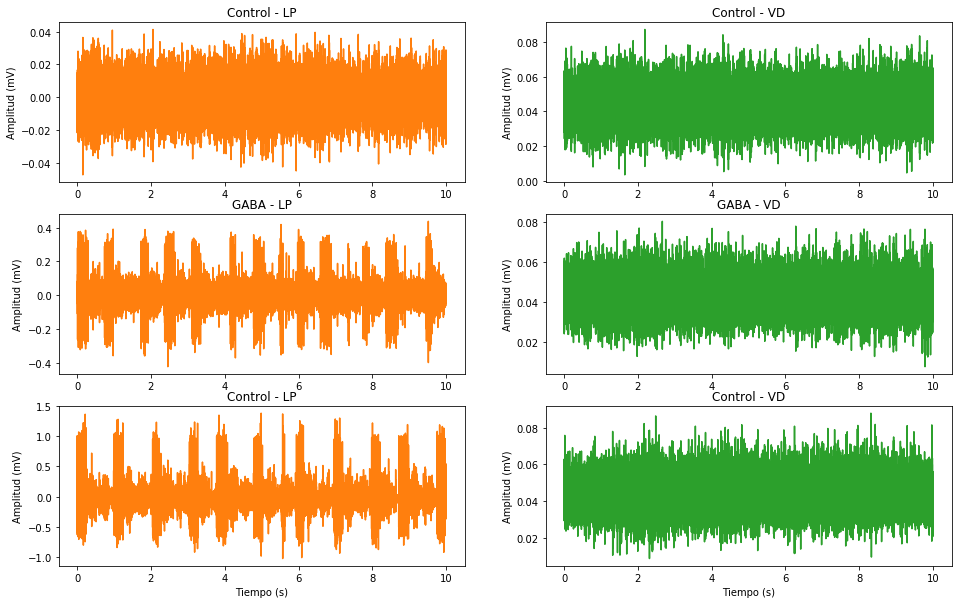

In [222]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 2,figsize=(16, 10))

ax1[0].plot(np.linspace(0.,1,len(pd_control.vd[:100000]))/0.1,ifft(np.where(np.abs(pd_control_fft.vd_fft) < 1e3,0+0j,pd_control_fft.lp_fft)).real[:100000], color = 'C1')
ax1[0].set_title("Control - LP")
ax1[0].set_ylabel('Amplitud (mV)')

ax1[1].plot(np.linspace(0.,1,len(pd_control.vd[:100000]))/0.1,ifft(np.where(np.abs(pd_control_fft.vd_fft) < 1e3,0+0j,pd_control_fft.vd_fft)).real[:100000], color = 'C2')
ax1[1].set_title("Control - VD")
ax1[1].set_ylabel('Amplitud (mV)')

ax2[0].plot(np.linspace(0.,1,len(pd_gaba.vd[:100000]))/0.1,ifft(np.where(np.abs(pd_gaba_fft.lp_fft) < 1e3,0+0j,pd_gaba_fft.lp_fft)).real[:100000], color = 'C1')
ax2[0].set_title("GABA - LP")
ax2[0].set_ylabel('Amplitud (mV)')

ax2[1].plot(np.linspace(0.,1,len(pd_gaba.vd[:100000]))/0.1,ifft(np.where(np.abs(pd_gaba_fft.vd_fft) < 1e3,0+0j,pd_gaba_fft.vd_fft)).real[:100000], color = 'C2')
ax2[1].set_title("GABA - VD")
ax2[1].set_ylabel('Amplitud (mV)')

ax3[0].plot(np.linspace(0.,1,len(pd_recuperacion.vd[:100000]))/0.1,ifft(np.where(np.abs(pd_recuperacion_fft.lp_fft) < 1e3,0+0j,pd_recuperacion_fft.lp_fft)).real[:100000], color = 'C1')
ax3[0].set_title("Control - LP")
ax3[0].set_xlabel('Tiempo (s)')
ax3[0].set_ylabel('Amplitud (mV)')

ax3[1].plot(np.linspace(0.,1,len(pd_recuperacion.vd[:100000]))/0.1,ifft(np.where(np.abs(pd_recuperacion_fft.vd_fft) < 1e3,0+0j,pd_recuperacion_fft.vd_fft)).real[:100000], color = 'C2')
ax3[1].set_title("Control - VD")
ax3[1].set_xlabel('Tiempo (s)')
ax3[1].set_ylabel('Amplitud (mV)')

plt.show()

In [164]:
np.where(np.abs(pd_gaba_fft.vd_ps) < 1e-7,0,np.abs(pd_gaba_fft.vd_ps))

array([0.00375134, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ])

In [177]:
ifft(np.where(np.abs(pd_gaba_fft.vd_ps) < 1e-7,0,np.abs(pd_gaba_fft.vd_ps)))

array([2.29774467e-10+0.00000000e+00j, 2.29725986e-10-1.69636649e-29j,
       2.29588910e-10-3.15039491e-29j, ...,
       2.29386558e-10+1.20843542e-29j, 2.29588910e-10+7.41728372e-29j,
       2.29725986e-10+8.05576196e-29j])

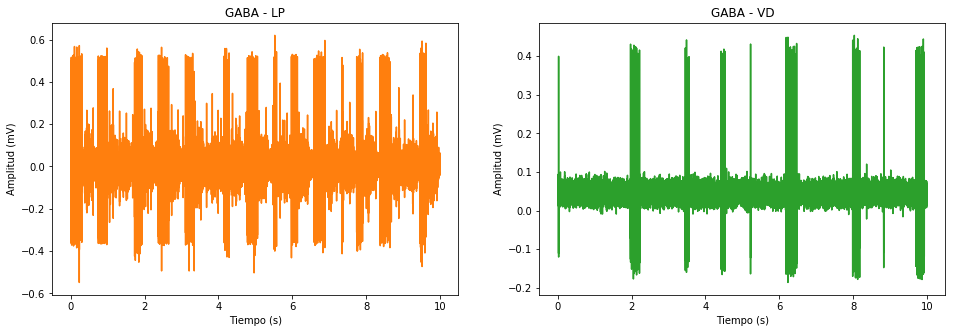

In [195]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 5))

ax1.plot(np.linspace(0.,1,len(pd_gaba.vd[:100000]))/0.1,pd_gaba.lp[:100000], color = 'C1')
ax1.set_title("GABA - LP")
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Amplitud (mV)')

ax2.plot(np.linspace(0.,1,len(pd_gaba.vd[:100000]))/0.1,pd_gaba.vd[:100000], color = 'C2')
ax2.set_title("GABA - VD")
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Amplitud (mV)')

plt.show()